<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Optimisation%20Parameters_Grid%20or%20Random%20Search(5%20fold).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 16.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [5]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [6]:
df.columns


Index(['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature',
       'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3',
       'CO2 Uptake'],
      dtype='object')

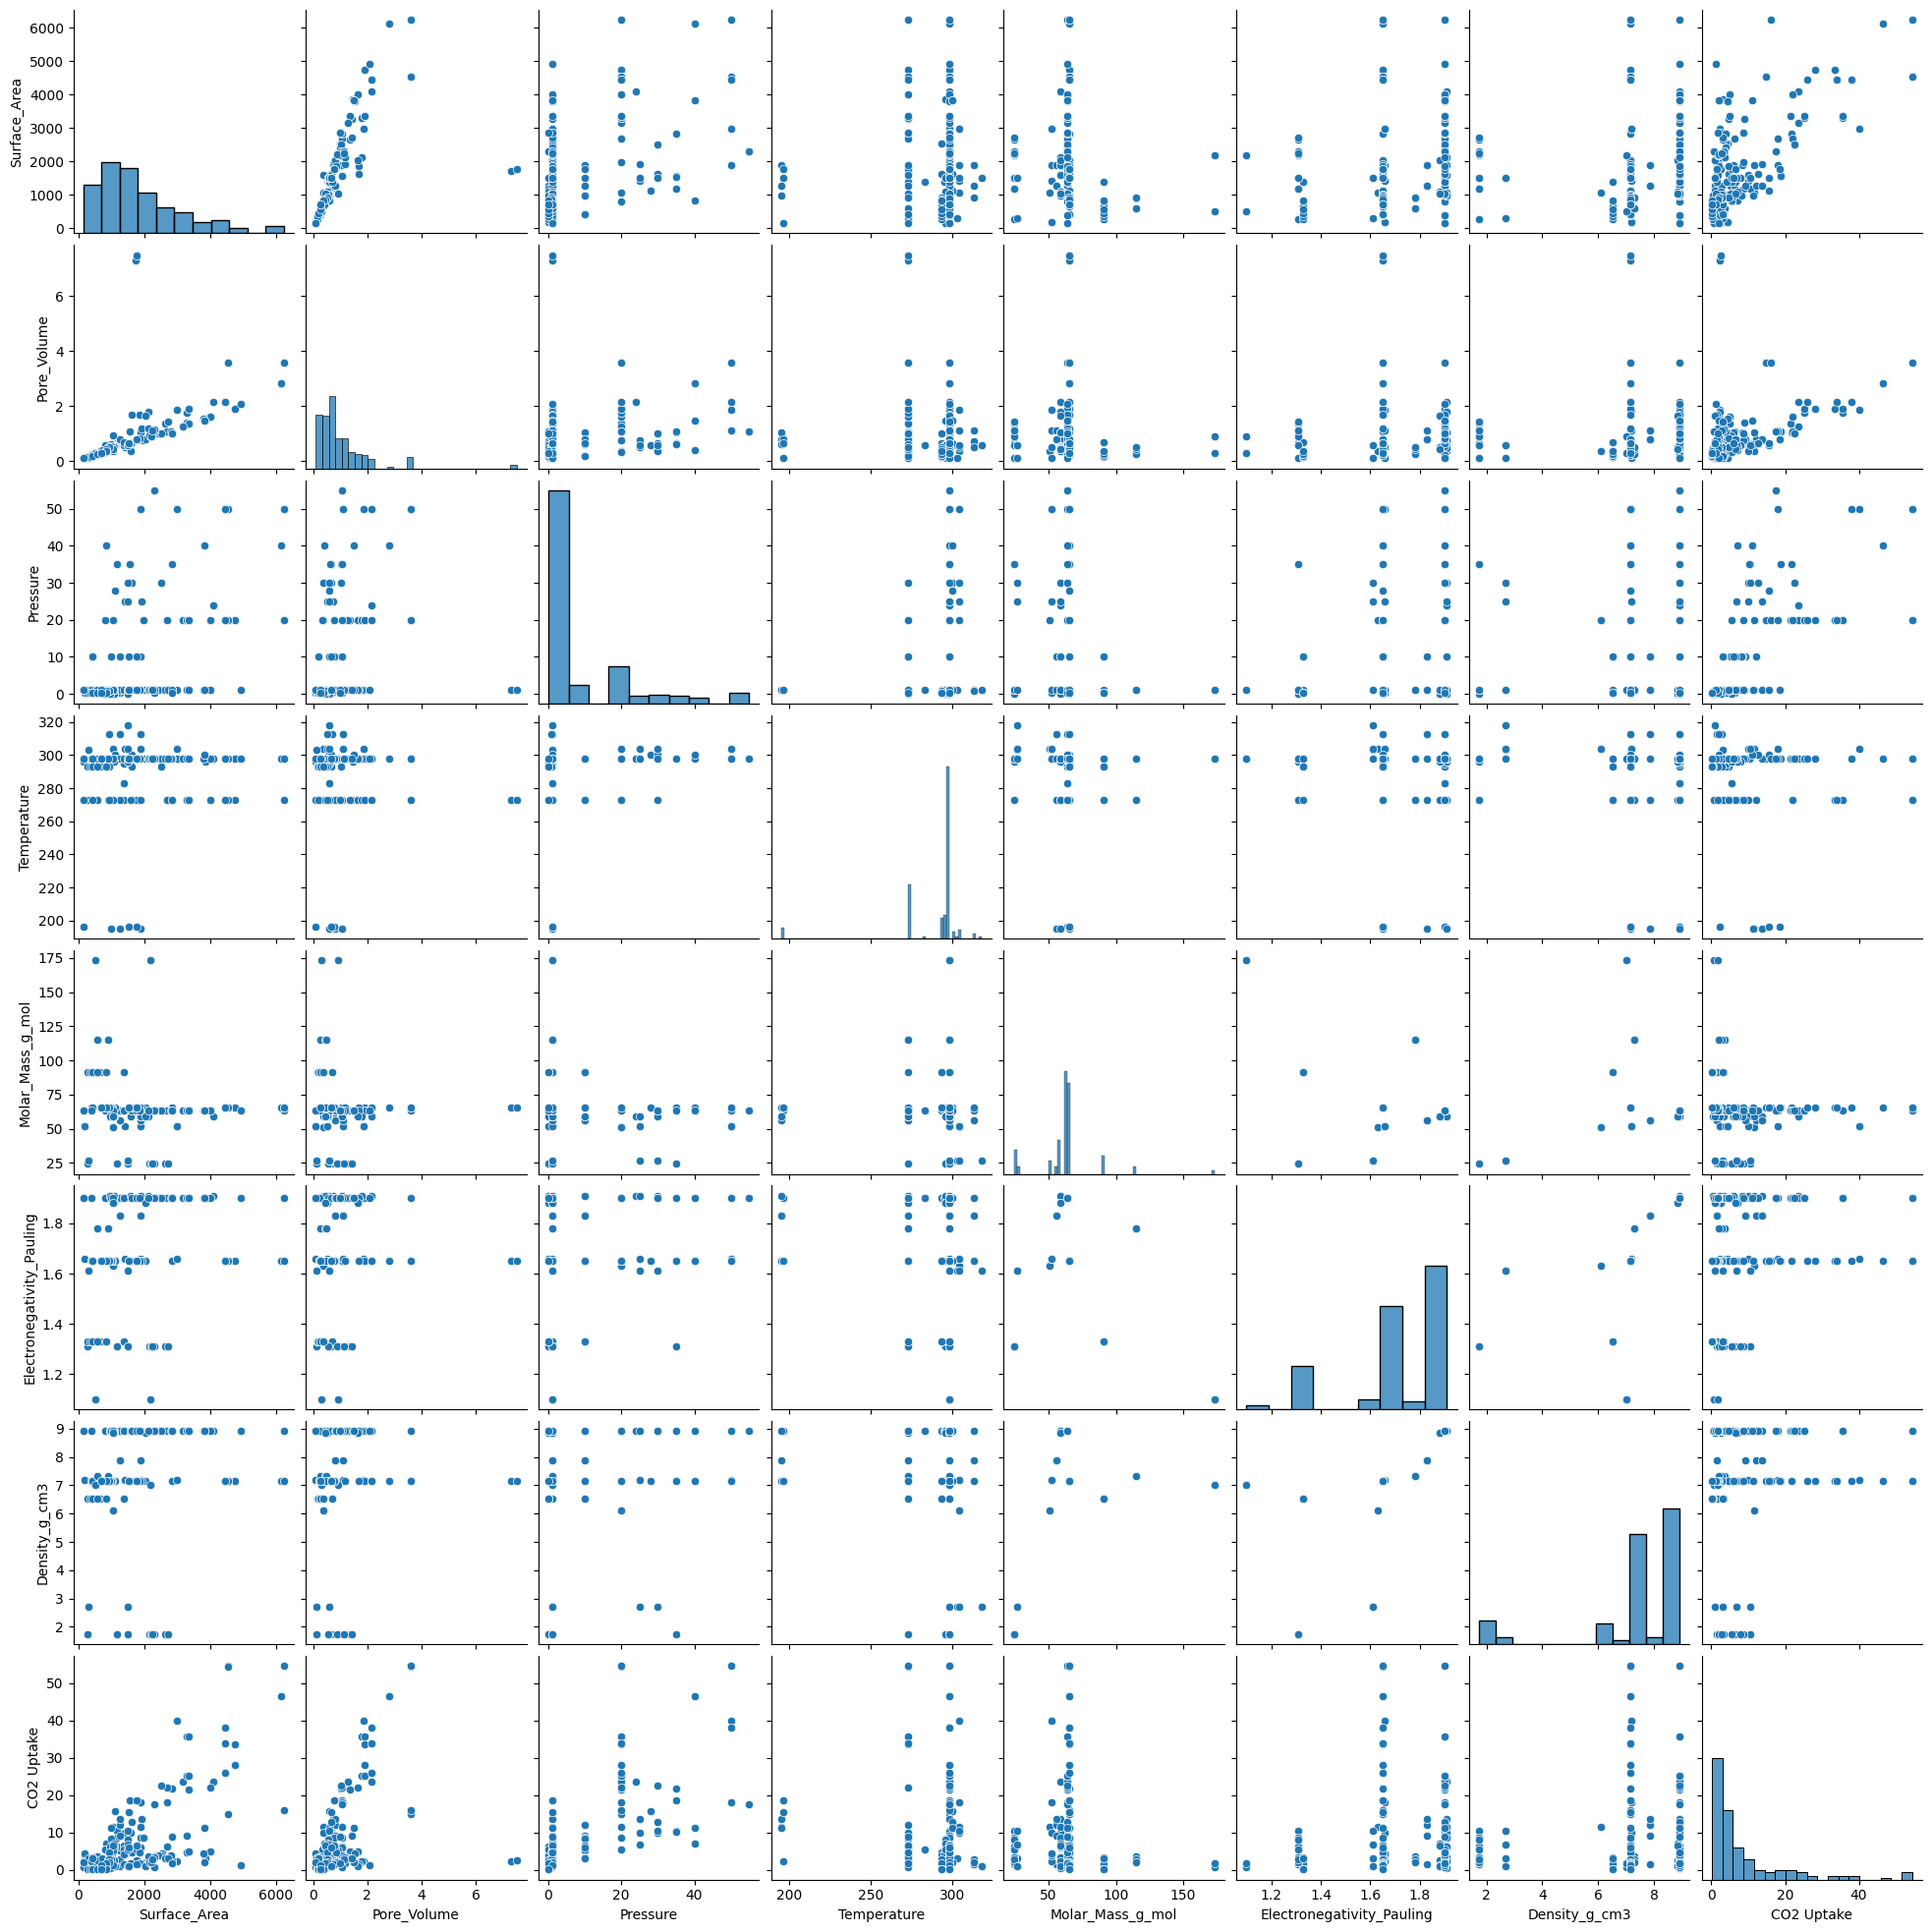

In [7]:
sns.pairplot(df)

In [8]:
df.describe().round(2)

,Surface_Area,Pore_Volume,Pressure,Temperature,Molar_Mass_g_mol,Electronegativity_Pauling,Density_g_cm3,CO2 Uptake
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,1876.24,1.01,8.48,289.98,63.16,1.71,7.37,8.73
std,1349.32,1.03,13.30,20.94,20.49,0.21,2.04,11.50
min,147.00,0.10,0.10,195.00,24.31,1.10,1.74,0.10
25%,966.00,0.46,1.00,293.00,58.93,1.65,7.14,2.01
50%,1514.00,0.70,1.00,298.00,63.55,1.66,7.19,4.23
75%,2528.00,1.14,17.50,298.00,65.38,1.90,8.92,10.15
max,6240.00,7.50,55.00,318.00,173.05,1.91,8.92,54.50


In [9]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values

In [12]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

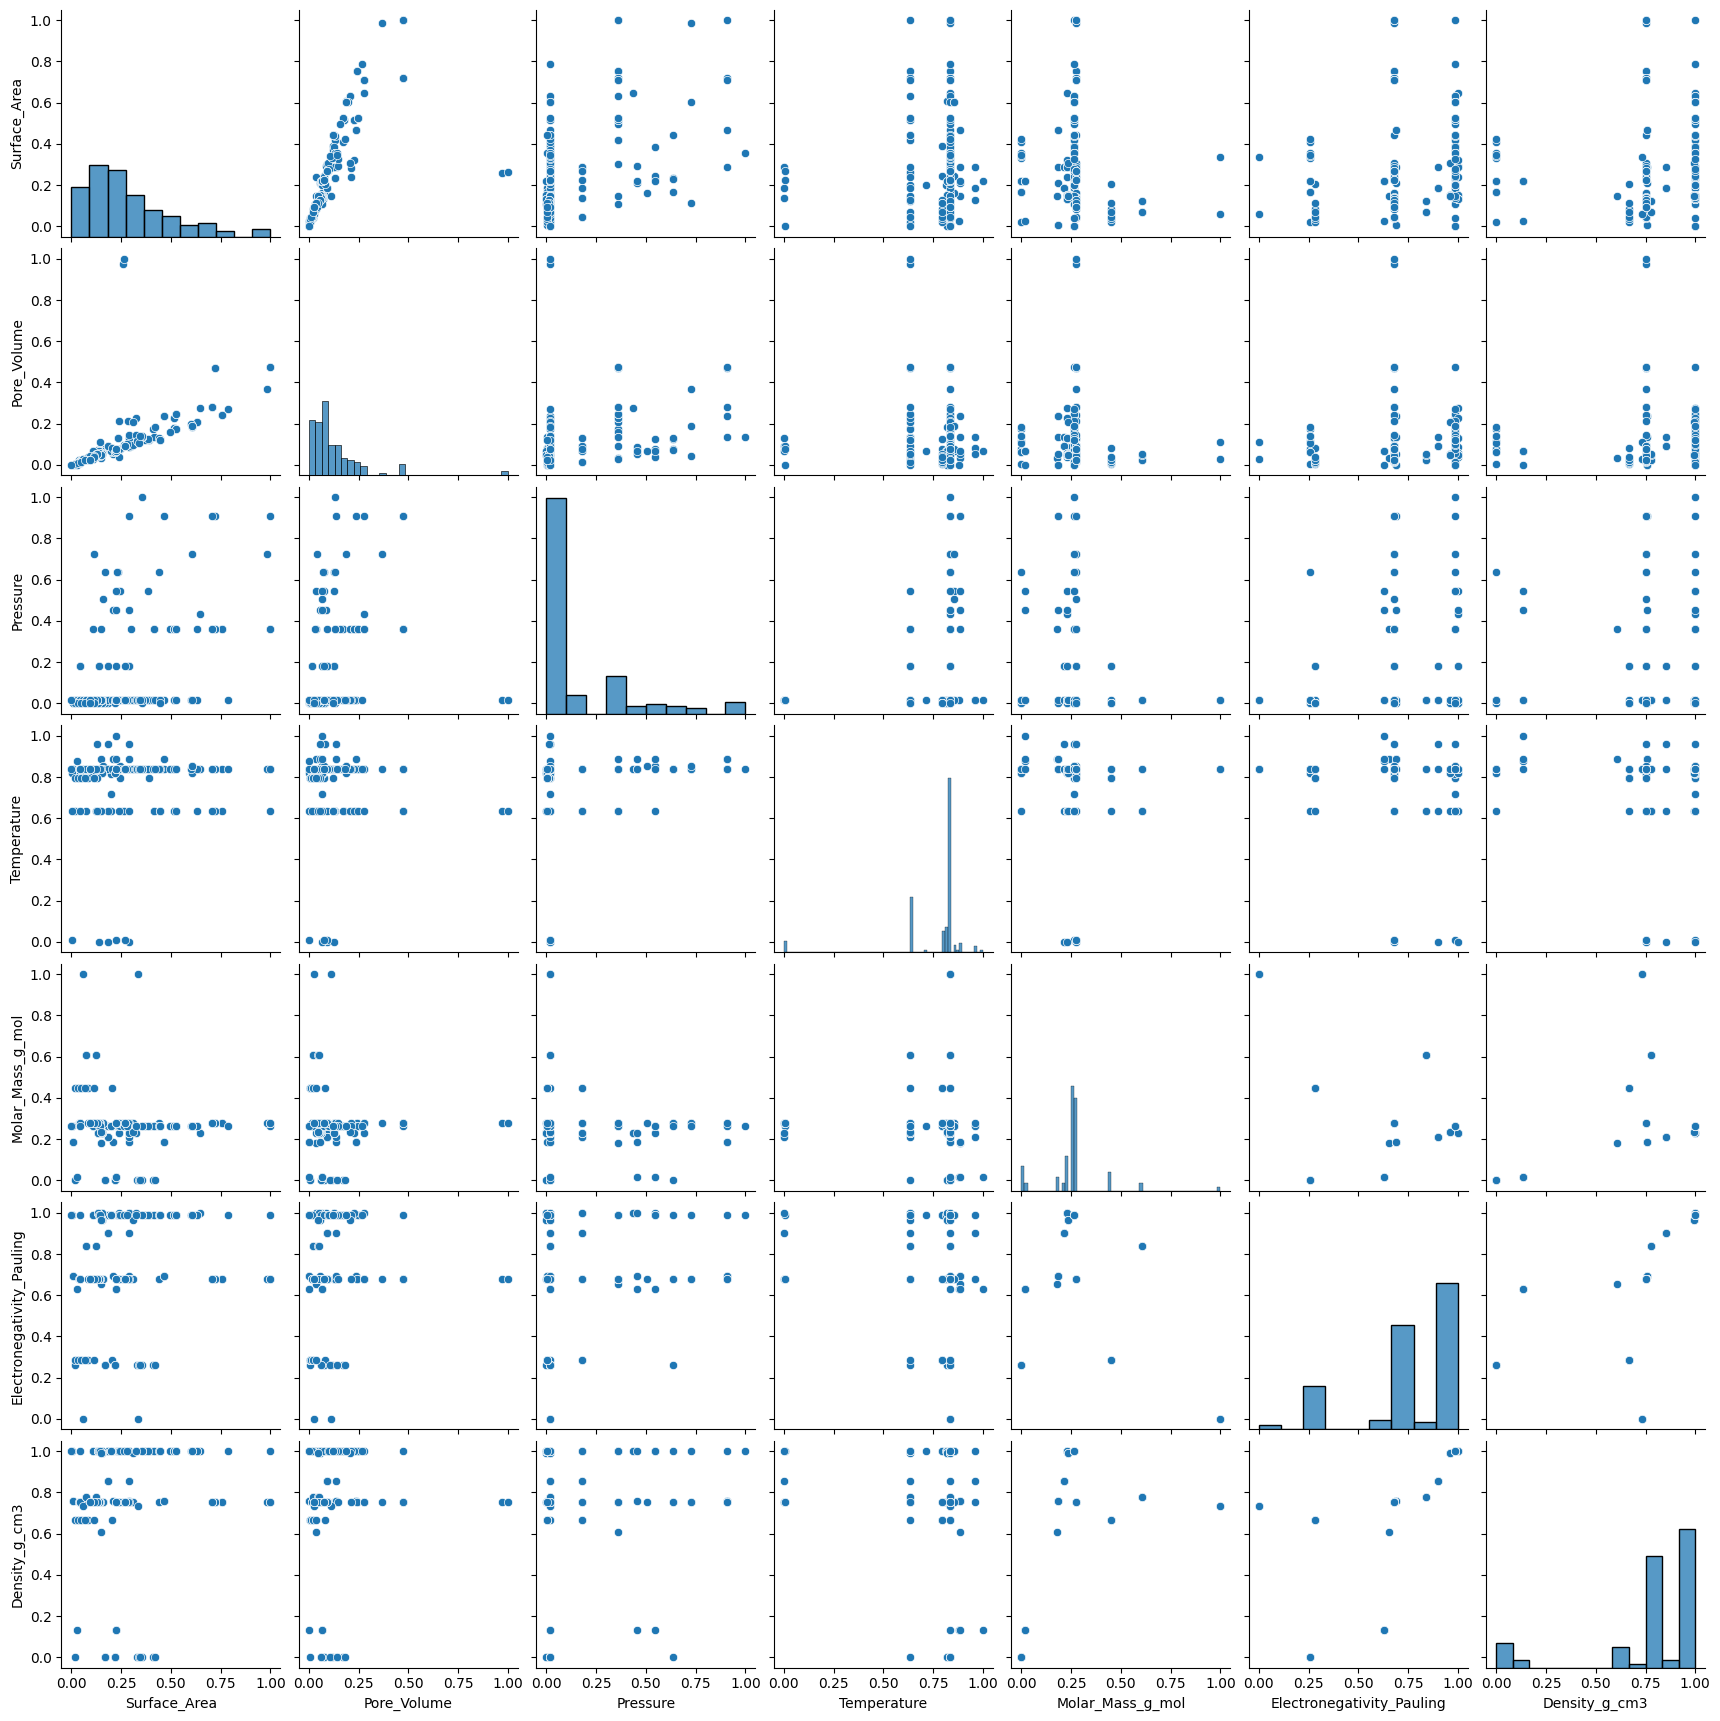

In [14]:
sns.pairplot(X_scaled)

In [15]:
X_scaled.describe().round(2)

,Surface_Area,Pore_Volume,Pressure,Temperature,Molar_Mass_g_mol,Electronegativity_Pauling,Density_g_cm3
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,0.28,0.12,0.15,0.77,0.26,0.76,0.78
std,0.22,0.14,0.24,0.17,0.14,0.26,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.05,0.02,0.80,0.23,0.68,0.75
50%,0.22,0.08,0.02,0.84,0.26,0.69,0.76
75%,0.39,0.14,0.32,0.84,0.28,0.99,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
# #Print shapes of the splits to verify
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

X_train shape: (132, 7)
X_test shape: (34, 7)
y_train shape: (132,)
y_test shape: (34,)


In [16]:
# Initialize the model
lm = LinearRegression()


In [17]:
# Define the parameter grid
param_grid = {'fit_intercept':[True,False]}

In [18]:
# Initialize the grid search object
grid = GridSearchCV(lm, param_grid, cv=5)

In [21]:
# Fit the grid search object to the data
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [32]:

PolynomialFeatures(degree=2, include_bias=False)

poly.fit_transform(X)

X_test_poly = poly.transform(X)

In [33]:
# Make predictions on the test set
y_pred = grid.predict(X)

In [34]:
# Evaluate the model's performance
r2 = r2_score(y,y_pred)
MSE = mean_squared_error(y,y_pred)
MAE = mean_absolute_error(y,y_pred)

print("r2_score:", r2)
print("mean_absolute_error:", MAE)
print("mean_squared_error:", MSE)

r2_score: 0.7442914563641412
mean_absolute_error: 4.144736450254494
mean_squared_error: 33.5885496454721


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Initialize the model
lm = LinearRegression()

In [37]:
# Define the parameter distribution
param_dist = {
    'fit_intercept': [True, False],  # if fits the intercept
}

In [38]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lm,
    param_distributions=param_dist,
    n_iter=4,  # Try the parameters
    cv=5,      # 5-fold cross-validation
)

In [39]:
# Fit the model
random_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=4,
                   param_distributions={'fit_intercept': [True, False]})

In [40]:
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters found:  {'fit_intercept': True}
Best score:  -2.4882726822964516


In [41]:
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

PolynomialFeatures(degree=2, include_bias=False)

poly.fit_transform(X)

X_test_poly = poly.transform(X)

In [42]:
# Make predictions on the test set
y_pred = grid.predict(X)

In [44]:
# Evaluate the model's performance
r2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print("r2_score:", r2)
print("mean_absolute_error:", MAE)
print("mean_squared_error:", MSE)

r2_score: 0.7442914563641412
mean_absolute_error: 4.144736450254494
mean_squared_error: 33.5885496454721
